In [31]:
# Import libraries

import numpy as np
from scipy.special import hermite, factorial
import matplotlib.pyplot as plt


In [32]:
# import parameter from config file

import yaml

with open("../config.yml", "r") as file:
    config = yaml.safe_load(file)
    planck_const = config["params"]["hbar"]
    quantum_state = config["params"]["quantum_state"]

In [33]:
# set the limit for the x
X = np.linspace(-5, 5, 1000)

In [34]:
def get_wavefunction(n, X):
    """
    Wavefunction for the nth quantum state in dimensionless units.

    params:
        n: Order of polynomial
        X: Position variable
    
    Returns:
        Wavefunction psi
    """
    hn = hermite(n) # Hermite polynomial
    normalization = 1 / (np.sqrt(2**n*factorial(n)*np.pi**0.25))
    return normalization * hn(X) * np.exp(-X**2/2)

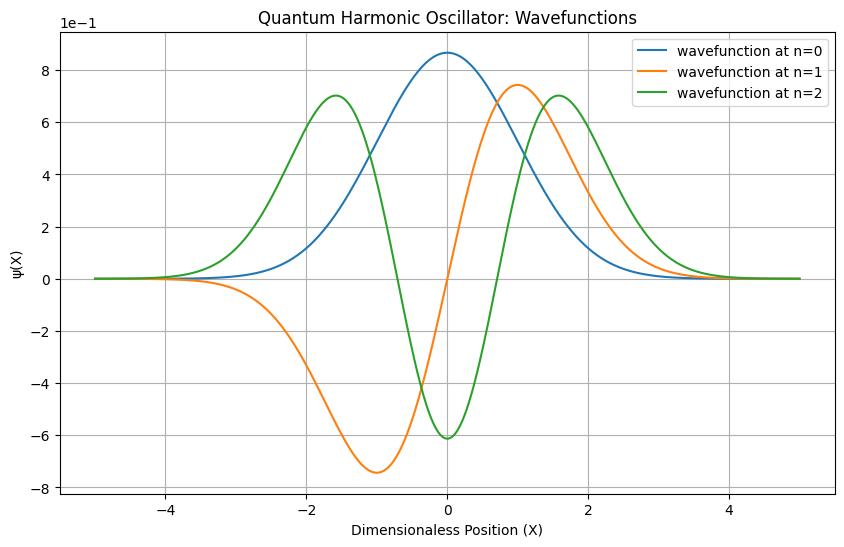

In [47]:
# plot the wavefunctions for given quantum state

plt.figure(figsize=(10, 6))

for i in range(quantum_state):
    psi_n = get_wavefunction(i, X)

    plt.plot(X, psi_n, label=f"wavefunction at n={i}")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    
plt.title("Quantum Harmonic Oscillator: Wavefunctions")
plt.xlabel("Dimensionaless Position (X)")
plt.ylabel("ψ(X)")
plt.legend()
plt.grid()
plt.show()